In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('titanic.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df1.copy()

## DATA CLEANING

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Age"] = df["Age"].fillna(
                df['Age'].mean()
            )

In [6]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [7]:
df = df.set_index('PassengerId')

In [8]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


# UNIVARIATE ANALYSIS

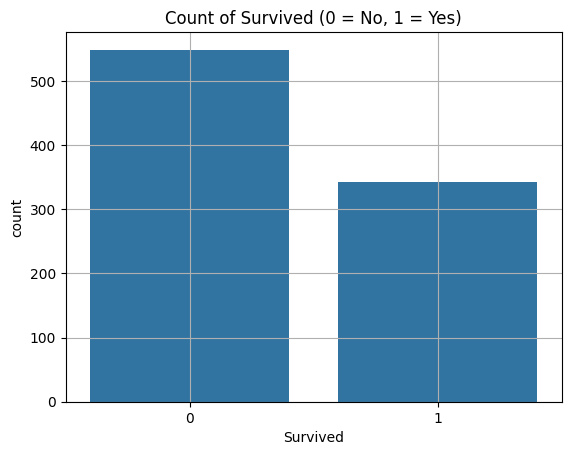

Overall survival rate: 38.38%


In [11]:
# target variable Survived

sns.countplot(x="Survived", data=df)
plt.title("Count of Survived (0 = No, 1 = Yes)")
plt.grid(True)
plt.show()

survival_rate = df["Survived"].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

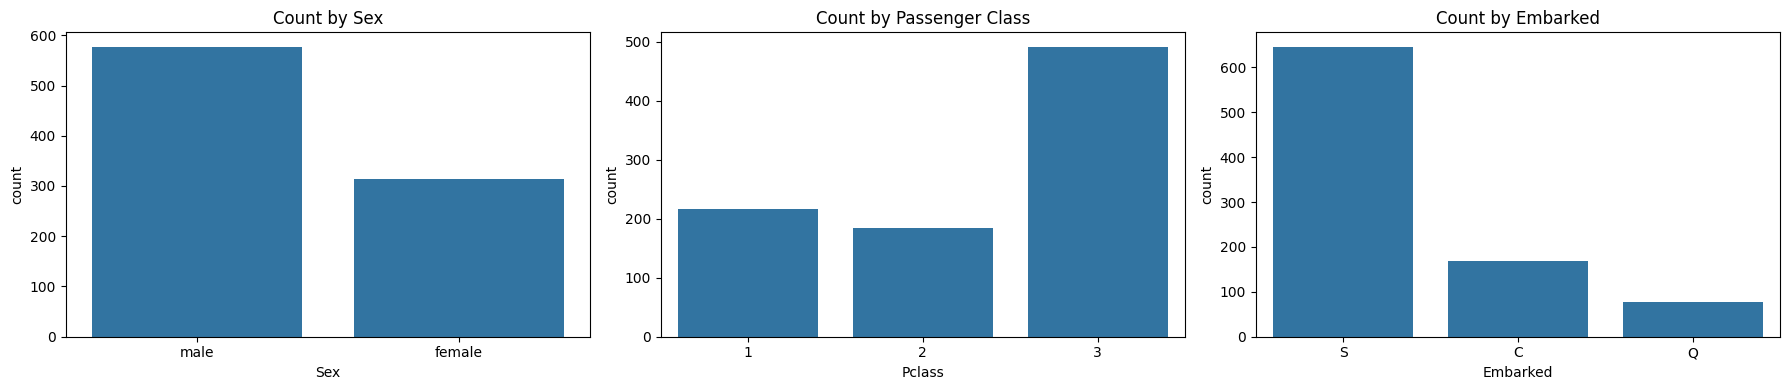

In [12]:
# Categorical variables – Sex, Pclass, Embarked

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.countplot(x="Sex", data=df, ax=axes[0])
axes[0].set_title("Count by Sex")

sns.countplot(x="Pclass", data=df, ax=axes[1])
axes[1].set_title("Count by Passenger Class")

sns.countplot(x="Embarked", data=df, ax=axes[2])
axes[2].set_title("Count by Embarked")

plt.tight_layout()
plt.show()

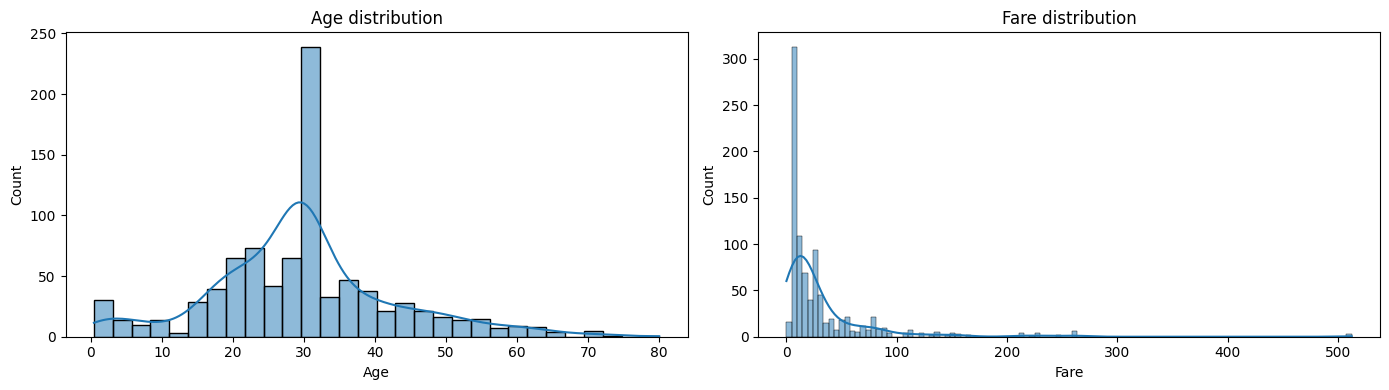

In [13]:
# Numerical distributions – Age, Fare

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df["Age"], kde=True, ax=axes[0])
axes[0].set_title("Age distribution")

sns.histplot(df["Fare"], kde=True, ax=axes[1])
axes[1].set_title("Fare distribution")

plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS

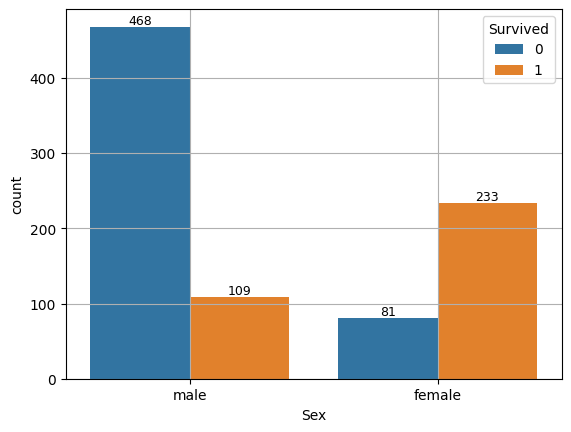

In [14]:
## sex vs survived

ax = sns.countplot(data= df, x= 'Sex', hue= 'Survived')

for bar in ax.patches:
    height = int(bar.get_height())
    if height >  0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')
        
plt.grid(True)
plt.show()

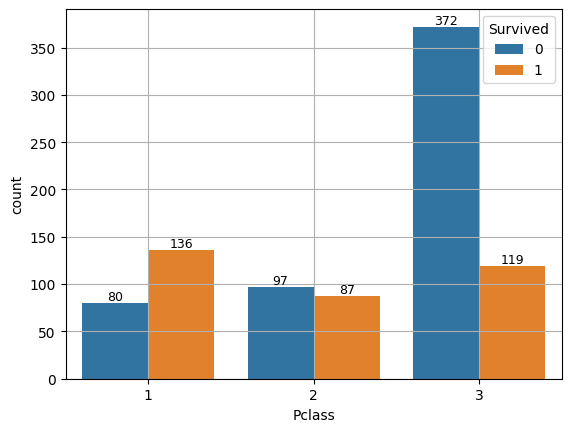

In [15]:
## Passenger class vs survived

ax = sns.countplot(data= df, x= 'Pclass', hue= 'Survived')

for bar in ax.patches:
    height = int(bar.get_height())
    if height >  0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')
        
plt.grid(True)
plt.show()

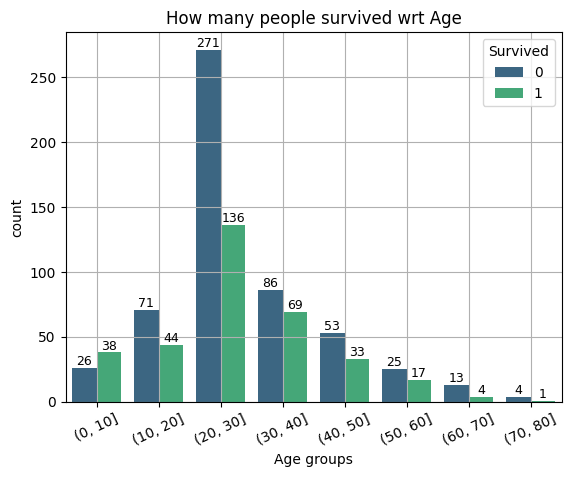

In [16]:
# Age vs survived

df["age_bin"] = pd.cut(df["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

ax = sns.countplot(
        data = df,
        x = 'age_bin',
        hue = 'Survived',
        palette = 'viridis'
    )

for bar in ax.patches:
    height = int(bar.get_height())
    if height>0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width()/2, height),
                     ha = 'center', va = 'bottom', fontsize = 9)

plt.xlabel("Age groups")
plt.xticks(rotation = 25)
plt.title("How many people survived wrt Age")
plt.grid(True)
plt.show()

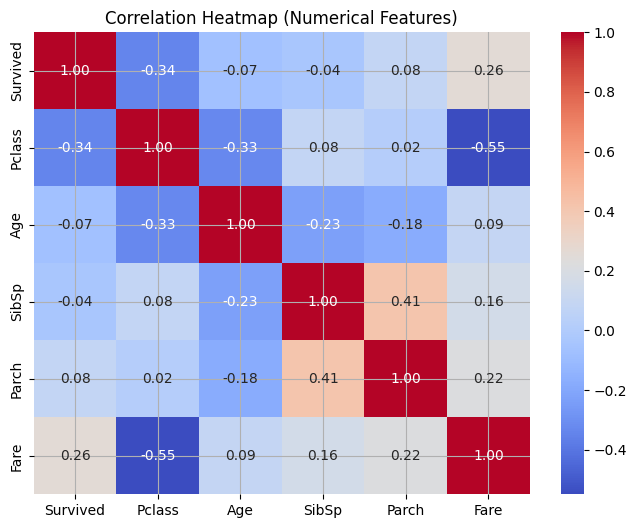

In [17]:
# Correlation heatmap (numerical features)

num_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.grid(True)
plt.show()

# PCA

In [54]:
pca_df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].copy()

In [55]:
# One-hot encode
pca_features = pd.get_dummies(
    pca_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]],
    drop_first=True
)

In [56]:
# Standardization: 
X = pca_features.values.astype(float)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=1)
X_std[X_std == 0] = 1.0  

X_scaled = (X - X_mean) / X_std

print("Shape of feature matrix for PCA:", X_scaled.shape)

Shape of feature matrix for PCA: (891, 8)


In [57]:
cov_matrix = np.cov(X_scaled, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

k = 4
eigenvectors_3 = eigenvectors[:, :k]
eigenvalues_3 = eigenvalues[:k]

explained_variance_ratio = eigenvalues_3 / eigenvalues.sum()

# Project data onto the selected 3 principal components
X_pca = X_scaled.dot(eigenvectors_3)

print("Shape after PCA:", X_pca.shape)
print("Explained variance ratio:", explained_variance_ratio)

Shape after PCA: (891, 4)
Explained variance ratio: [0.22972487 0.2128999  0.19321558 0.10495701]


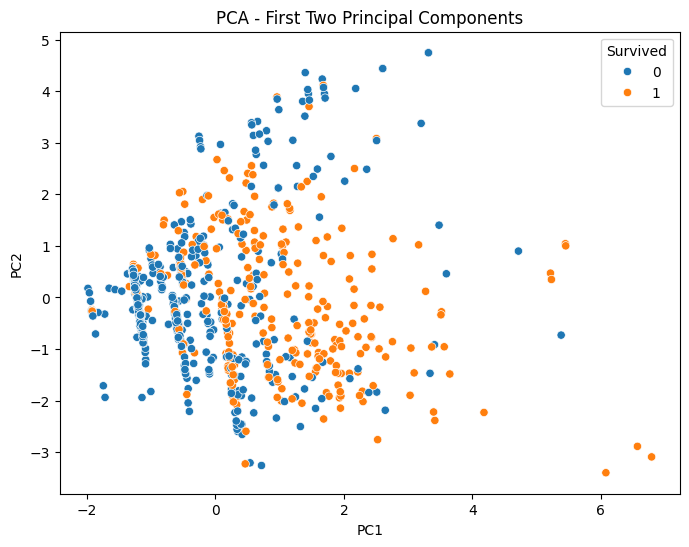

In [58]:
# Visualizing first two principal components
y = pca_df["Survived"].values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.legend(title="Survived")
plt.show()

In [59]:
# Prepare data for SVM

X_all = X_scaled

y_all = df["Survived"].values
y_svm = np.where(y_all == 1, 1, -1)  

print("Feature shape:", X_all.shape)
print("Label distribution:", np.unique(y_svm, return_counts=True))

Feature shape: (891, 8)
Label distribution: (array([-1,  1]), array([549, 342]))


# MODEL TRAINING

In [60]:
np.random.seed(42)
indices = np.random.permutation(len(X_all))
train_size = int(0.8 * len(X_all))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X_all[train_idx]
y_train = y_svm[train_idx]

X_test = X_all[test_idx]
y_test = y_svm[test_idx]

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 712
Test size: 179


In [61]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_epochs = n_epochs
        self.w = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0

        for epoch in range(self.n_epochs):
            margins = y * (X.dot(self.w) + self.b)

            # Hinge loss: max(0, 1 - margin)
            losses = np.maximum(0, 1 - margins)
            loss = self.lambda_param * np.dot(self.w, self.w) + np.mean(losses)
            self.loss_history.append(loss)

            # Gradient computation
            misclassified = margins < 1

            # Gradient of loss w.r.t w and b
            dw = 2 * self.lambda_param * self.w - np.mean((y[misclassified, None] * X[misclassified]), axis=0)
            db = -np.mean(y[misclassified]) if np.any(misclassified) else 0.0

            # Parameter update
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def decision_function(self, X):
        return X.dot(self.w) + self.b

    def predict(self, X):
        decision = self.decision_function(X)
        return np.where(decision >= 0, 1, -1)

In [78]:
#Train
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_epochs=4000)
svm.fit(X_train, y_train)

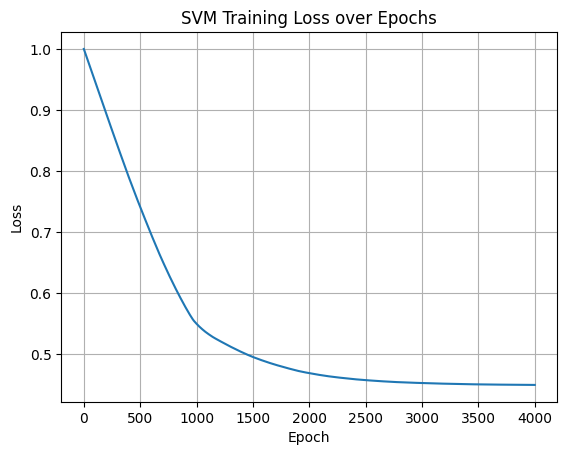

In [79]:
# Plot training loss vs epochs
plt.figure()
plt.plot(svm.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SVM Training Loss over Epochs")
plt.grid(True)
plt.show()

In [80]:
# Evaluate
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Train accuracy: {train_accuracy:.2%}")
print(f"Test accuracy: {test_accuracy:.2%}")

Train accuracy: 78.79%
Test accuracy: 81.01%


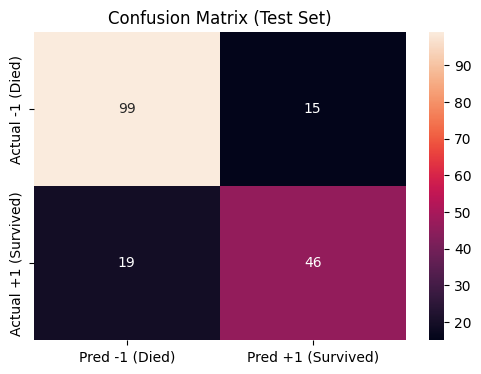

In [81]:
# Confusion matrix

def confusion_matrix_binary(y_true, y_pred):
    # Labels:-1, +1
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))
    return np.array([[tn, fp],
                     [fn, tp]])

cm = confusion_matrix_binary(y_test, y_test_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual -1 (Died)", "Actual +1 (Survived)"],
    columns=["Pred -1 (Died)", "Pred +1 (Survived)"]
)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True)
plt.title("Confusion Matrix (Test Set)")
plt.show()

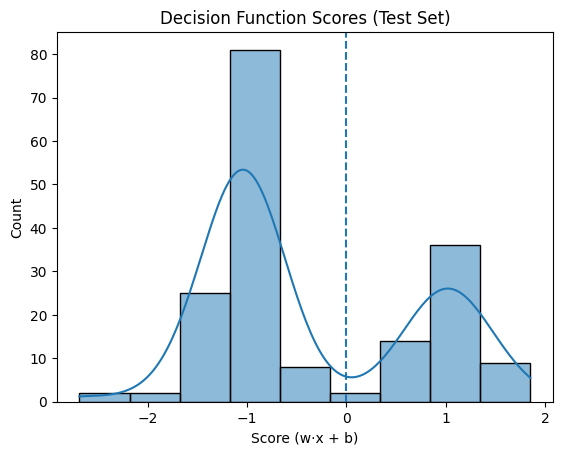

In [82]:
# Visualize decision scores distribution
decision_scores = svm.decision_function(X_test)

plt.figure()
sns.histplot(decision_scores, kde=True)
plt.axvline(0, linestyle="--")  # decision boundary
plt.title("Decision Function Scores (Test Set)")
plt.xlabel("Score (w·x + b)")
plt.ylabel("Count")
plt.show()

In [83]:
tn, fp = cm[0]
fn, tp = cm[1]

precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
f1_score = (2 * precision * recall) / (precision + recall) 

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Precision: 0.7541
Recall:    0.7077
F1 Score:  0.7302


In [84]:
# ROC curve 

y_true = y_test
scores = decision_scores

sorted_indices = np.argsort(scores)[::-1]
scores_sorted = scores[sorted_indices]
y_sorted = y_true[sorted_indices]

tpr_list = []
fpr_list = []

P = np.sum(y_true == 1)   # total positive
N = np.sum(y_true == -1)  # total negative

tp = fp = 0

for i in range(len(scores_sorted)):
    if y_sorted[i] == 1:
        tp += 1
    else:
        fp += 1

    tpr = tp / P
    fpr = fp / N

    tpr_list.append(tpr)
    fpr_list.append(fpr)

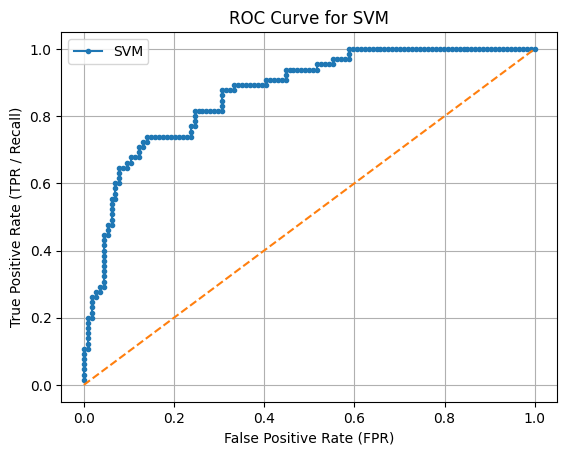

In [85]:
plt.figure()
plt.plot(fpr_list, tpr_list, marker=".", label="SVM")
plt.plot([0, 1], [0, 1], linestyle="--")  # classifier baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.title("ROC Curve for SVM")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
y_pred = svm.predict(X_test)

accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8101
